In [9]:
from __future__ import division
import numpy as np
import glob

In [25]:
data_type = 'genie'
nu_type ="NuTau"
int_type = 1
folder = '1' 
files = '1'

n_files = 10
i3_per_npz = 10 # 10 for NuE1 and NuMu1, 100 otherwise

name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'#+str(files)+'?_'
#name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)
#name = nu_type+'_'+str(int_type)
name2 = "BUMP3_"+nu_type+'_'+str(int_type)+'_'+str(folder)+'_'#+str(files)

print(name)

N_PRIM_CHILDREN = 3 
STRINGS_TO_SAVE = 10
N_Y_BINS = 60
N_X_BINS = 500
N_CHANNELS = 3

DEFAULT_INDEX = 2.88
DEFAULT_PHI = 2.1467

outer_strings = set([1,2,3,4,5,6,7,13,14,21,22,30,31,40,41,50,51,59,60,67,68,72,73,74,75,76,77,78])

NuTau_1_1_


In [11]:
def get_rates_genie(one_weights, nu_E, n_npz_files, i3_per_npz, evts_per_i3file, spectral_index=DEFAULT_INDEX, phi_0=DEFAULT_PHI):
    ''' returns the per-year weights for the given input parameters '''
    total_events = n_npz_files*i3_per_npz*evts_per_i3file
    secs_per_year = 31536000
    
    flux_weights = 1e-18*secs_per_year*phi_0*(nu_E/100e3)**(-spectral_index)

    return flux_weights/total_events*one_weights

In [18]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
preds_dtype = np.dtype(
    [     
        ('n1', np.float32),
        ('n2', np.float32),
        ('n3', np.float32),
        ('n4', np.float32)
    ]
)
map_dtype = np.dtype(
    [
        ("id", id_dtype),
        ('raw', np.int32),
        ('st_raw', np.int32,(3)),
        ('pulses', np.int32),
        ('st_pulses', np.int32,(3)),
        ('cal', np.int32),
        ('st_cal', np.int32,(3)),
        ('hlc', np.int32),
        ('st_hlc', np.int32,(3)),
        ('slc', np.int32),
        ('st_slc', np.int32,(3))
    ]
)
st_info_dtype = np.dtype(
    [
        ('q', np.float32),
        ('num', np.uint32),
        ('dist', np.float32)
    ]
)

particle_dtype = np.dtype(
    [
        ("tree_id", np.uint32,(2)),
        ("pdg", np.int32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
veto_dtype = np.dtype(                                             
    [                                                                             
        ("SPE_rlogl", np.float32),                                                      
        ("Cascade_rlogl", np.float32),
        ("SPE_rlogl_noDC", np.float32),                                                   
        ("Cascade_rlogl_noDC", np.float32),                                              
        ("FirstHitZ", np.float32),
        ("VHESelfVetoVertexPosZ", np.float32),                                             
        ("LeastDistanceToPolygon_Veto", np.float32)
    ]
)

hese_dtype = np.dtype(                                             
    [                                                                             
        ("qtot", np.float32),
        ("vheselfveto", np.bool_),
        ("vheselfvetovertexpos", np.float32,(3)),
        ("vheselfvetovertextime", np.float32),
        ("llhratio", np.float32)
    ]
)
#if data_type =='genie':
WEIGHT_KEY = "I3MCWeightDict"
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32), 
        ('TotalColumnDepthCGS',np.float32), 
        ('MaxAzimuth',np.float32), 
        ('SelectionWeight',np.float32), 
        ('InIceNeutrinoEnergy',np.float32), 
        ('PowerLawIndex',np.float32), 
        ('TotalPrimaryWeight',np.float32), 
        ('PrimaryNeutrinoZenith',np.float32), 
        ('TotalWeight',np.float32), 
        ('PropagationWeight',np.float32), 
        ('NInIceNus',np.float32), 
        ('TrueActiveLengthBefore',np.float32), 
        ('TypeWeight',np.float32), 
        ('PrimaryNeutrinoType',np.float32), 
        ('RangeInMeter',np.float32), 
        ('BjorkenY',np.float32), 
        ('MinZenith',np.float32), 
        ('InIceNeutrinoType',np.float32), 
        ('CylinderRadius',np.float32), 
        ('BjorkenX',np.float32), 
        ('InteractionPositionWeight',np.float32), 
        ('RangeInMWE',np.float32), 
        ('InteractionColumnDepthCGS',np.float32), 
        ('CylinderHeight',np.float32), 
        ('MinAzimuth',np.float32), 
        ('TotalXsectionCGS',np.float32), 
        ('OneWeightPerType',np.float32), 
        ('ImpactParam',np.float32), 
        ('InteractionType',np.float32), 
        ('TrueActiveLengthAfter',np.float32), 
        ('MaxZenith',np.float32), 
        ('InteractionXsectionCGS',np.float32), 
        ('PrimaryNeutrinoEnergy',np.float32), 
        ('DirectionWeight',np.float32), 
        ('InjectionAreaCGS',np.float32), 
        ('MinEnergyLog',np.float32), 
        ('SolidAngle',np.float32), 
        ('LengthInVolume',np.float32), 
        ('NEvents',np.uint32), 
        ('OneWeight',np.float32), 
        ('MaxEnergyLog',np.float32), 
        ('InteractionWeight',np.float32), 
        ('EnergyLost',np.float32)
    ]
)

info_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)
save_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("preds", preds_dtype),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)
save_3_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("dom", np.uint32),
        ("im_sum", np.float32,(3)),
        ("out_st", np.uint32,(3)),
        ("preds", preds_dtype),                
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qoth", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("wf_times", np.float,(180,3)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese", hese_dtype),
        ("weight", weight_dtype)

    ]
)
save_2_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("dom", np.uint32),
        ("im_sum", np.float32,(3)),
        ("out_st", np.uint32,(3)),
        ("preds", preds_dtype),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)

In [5]:
# size = 0
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#     for e in x:
#         if (e['qst']['q'][0][0] >= 2000):
#             size = size +1
#     print(file_name, len(x))
# print(size)

In [23]:
size = 0
#for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
for file_name in glob.glob('/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, len(x))
    size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_63_data.npz 1274
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_2_46_data.npz 1253
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_99_data.npz 1274
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_22_data.npz 1206
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_35_data.npz 1273
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_2_3_data.npz 1231
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_94_data.npz 1211
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_2_59_data.npz 1302
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_2_53_data.npz 1284
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_1_data.npz 1274
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_2_62_data.npz 1303
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BU

In [24]:
import tensorflow as tf
import os
physical_devices = tf.config.list_physical_devices()
print(physical_devices) 

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2,3,4"
from tensorflow.keras.models import load_model
model = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_2/vgg16_200k_QSt2000_dataset_norm_2.h5')
model_m = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_muon/vgg16_200k_QSt2000_dataset_norm_muon.h5')
model_3 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_300k_noQst2000_TvsE/vgg16_300k_noQSt2000_dataset_norm_TvsE_2.h5')
model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_700k_Qst_2000_MuvsTau_3/vgg16_700k_QSt2000_dataset_norm_MuVsTau_3.h5')
#model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_600k_Qst_2000_3class_classweight/vgg16_600k_QSt2000_dataset_norm_3class_classweight5.h5')

mean = 0.0012322452384978533 
std = 0.009694634936749935
mean_3 = 0.0002464977151248604
std_3 = 0.00594472698867321
mean_4 = 0.00036459346301853657
std_4 = 0.007035365793853998


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:2', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:3', device_type='XLA_GPU')]


In [26]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_3_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    #x = x[(x['id']['event_id']==680) & (x['id']['run_id']==137)]
    y = np.zeros(x.shape[0],dtype = save_3_dtype)
    print(file_name, x.shape, x['image'].shape,len(x),y.shape)
    
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_4)/std_4
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #print(pred_n1,pred_n4)
    for n,e in enumerate(x):
        sums =[np.sum(e['image'][0,:,i,0]) for i in range(60)]
        max_dom = np.argmax(sums)
        #print( e['qst']['num'][0])
        im_sum = [-1,-1,-1]
        im_sum[0] = np.sum(e['image'][0,:,:,0])
        im_sum[1] = np.sum(e['image'][0,:,:,1])
        im_sum[2] = np.sum(e['image'][0,:,:,2])
        
        top_st = int(e['qst']['num'][0][0] in outer_strings)
        top3_st = sum([1 for i in e['qst']['num'][0] if i in outer_strings])
        top10_st = sum([1 for i in e['qst_all']['num'][0] if i in outer_strings])
        #print(top_st,top3_st,top10_st)
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","dom","im_sum","out_st","preds","weight_val","qtot","qoth","cog","moi","ti","wf_times","qst","qst_all","map","primary","prim_daughter",\
           "logan_veto","hese","weight"]][n]=(e['id'], max_dom, im_sum, [top_st,top3_st,top10_st],preds,weight_val,e['qtot'],e['qoth'],\
                                              e['cog'],e['moi'],e["ti"],e["wf_times"],e['qst'],e['qst_all'],e['map'],e['primary'],e['prim_daughter'],\
                                              e['logan_veto'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    #print(y['out_st'])
    print(data[pos:pos+len(x)].shape,y.shape,pos,len(x))
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)


NuTau_1_1_
#.npz files =  10
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_63_data.npz (1274, 1) (1274, 1, 500, 60, 3) 1274 (1274,)
(1274,) (1274,) 0 1274
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_2_46_data.npz (1253, 1) (1253, 1, 500, 60, 3) 1253 (1253,)
(1253,) (1253,) 1274 1253
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_99_data.npz (1274, 1) (1274, 1, 500, 60, 3) 1274 (1274,)
(1274,) (1274,) 2527 1274
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_22_data.npz (1206, 1) (1206, 1, 500, 60, 3) 1206 (1206,)
(1206,) (1206,) 3801 1206
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_35_data.npz (1273, 1) (1273, 1, 500, 60, 3) 1273 (1273,)
(1273,) (1273,) 5007 1273
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_2_3_data.npz (1231, 1) (1231, 1, 500, 60, 3) 1231 (1231,)
(1231,) (1231,) 6280 1231
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTa

In [14]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    y = np.zeros(x.shape[0],dtype = save_dtype)    
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    for n,e in enumerate(x):   
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
           "logan_veto","hese_old","hese","weight"]][n]=(e['id'],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
                                                         e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
                                                         e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)

NuTau_1_1_1
#.npz files =  10
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)
554.7103762626648


NuTau_1_1_1
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


540.2434003353119


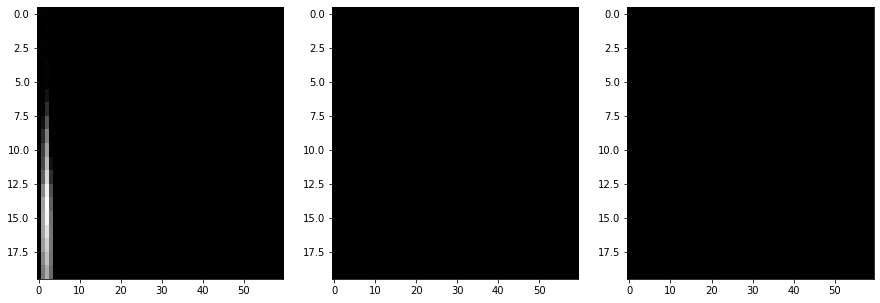

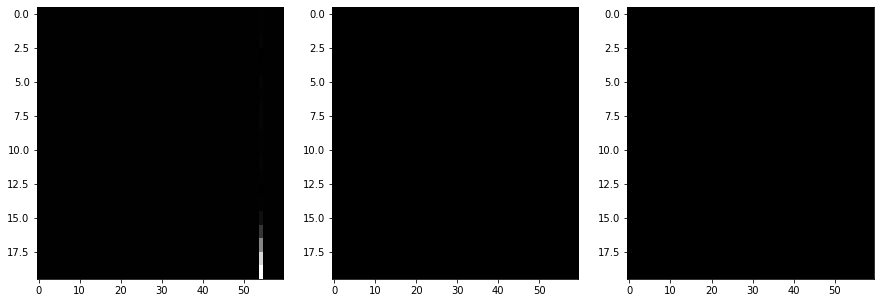

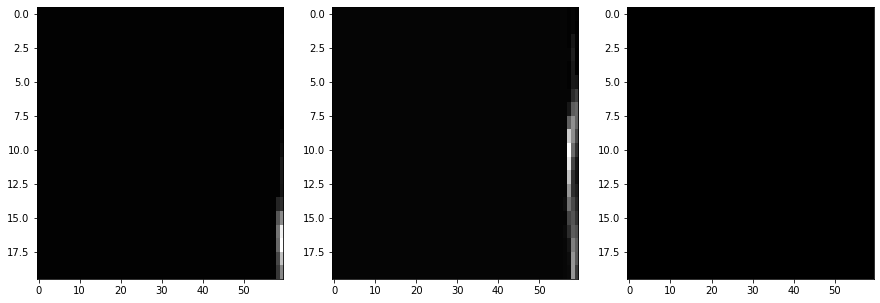

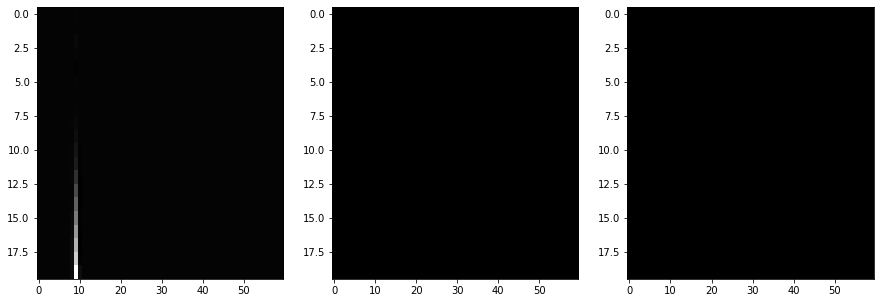

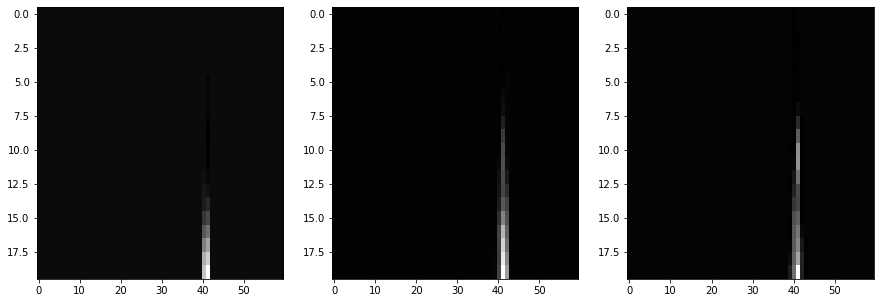

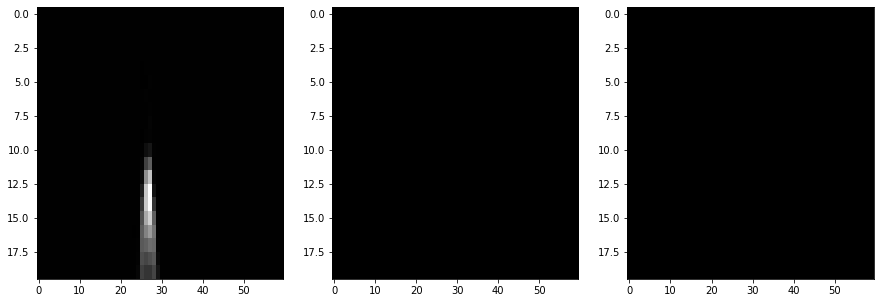

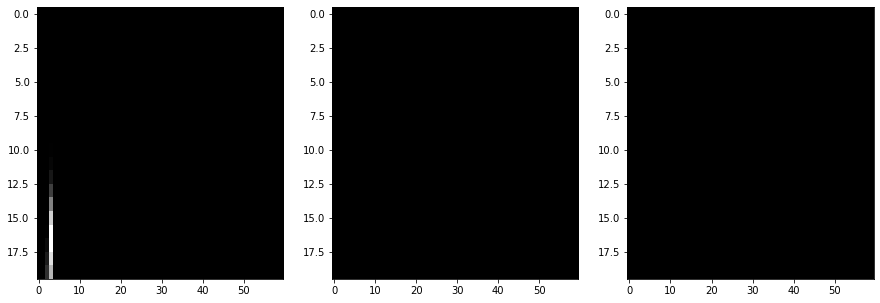

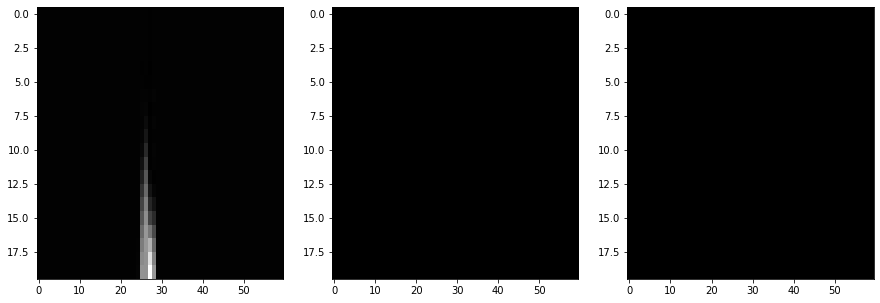

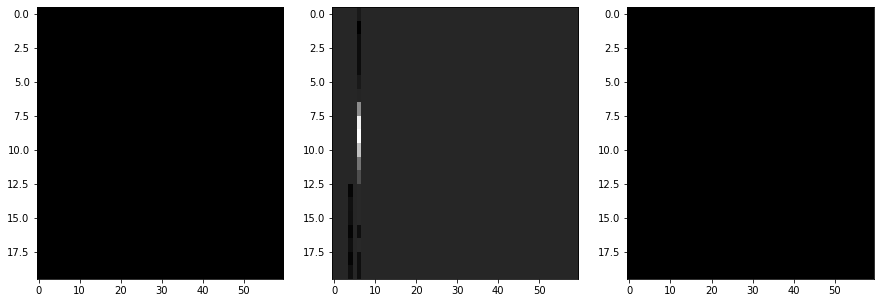

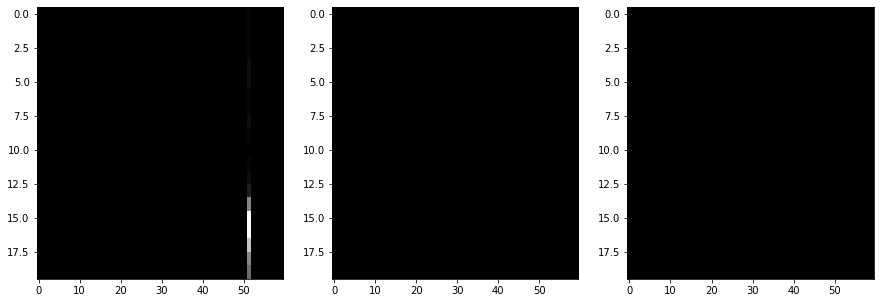

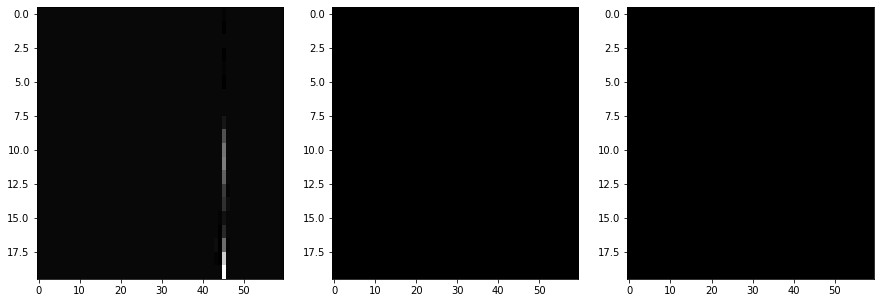

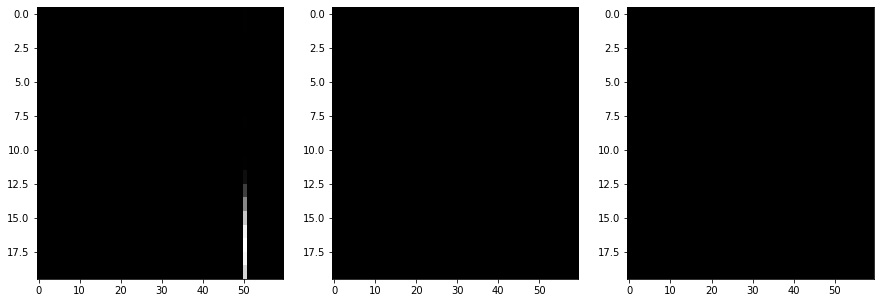

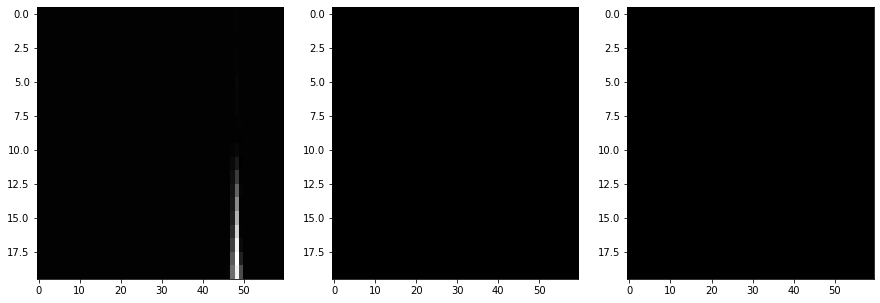

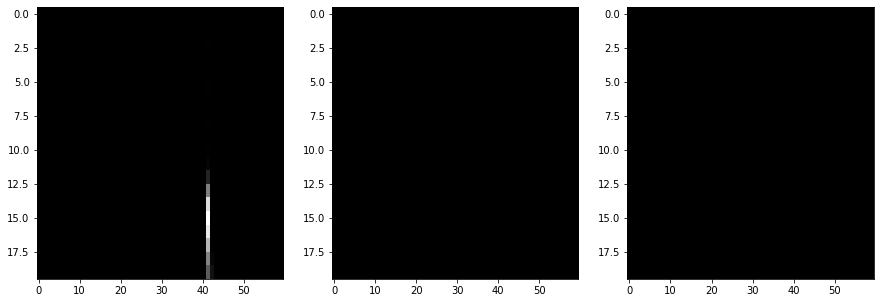

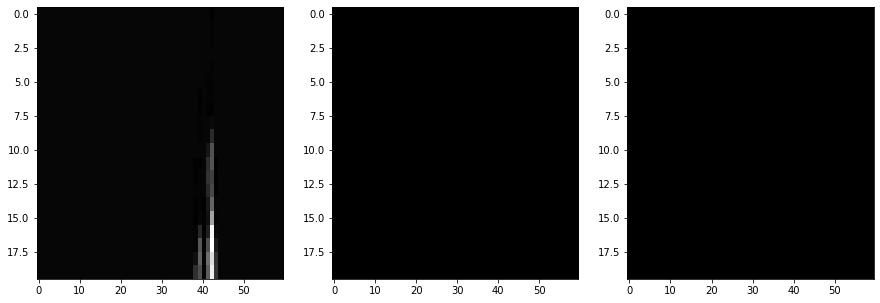

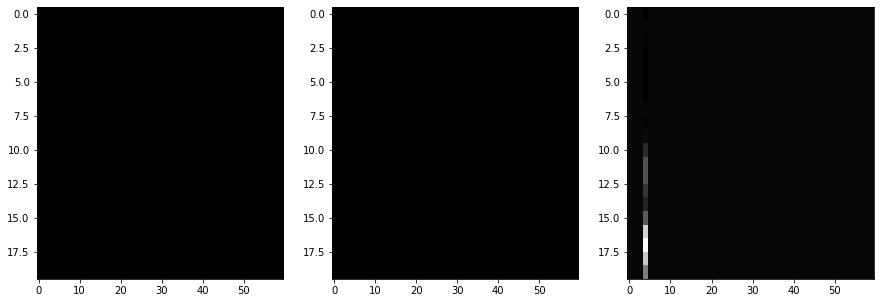

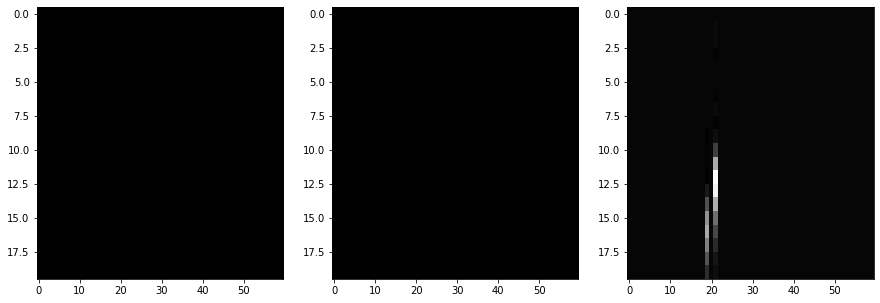

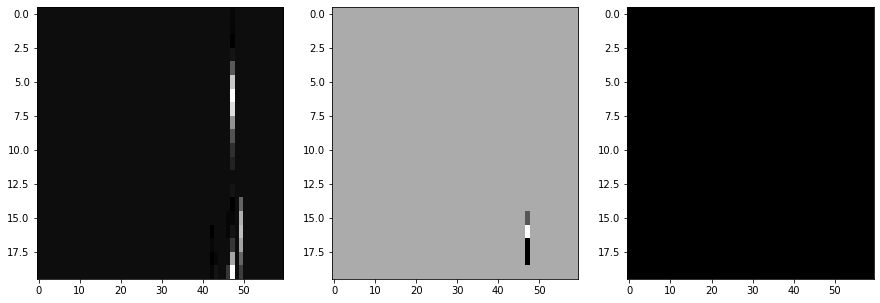

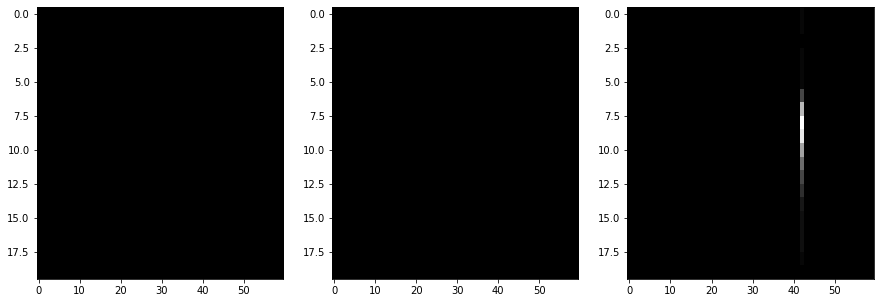

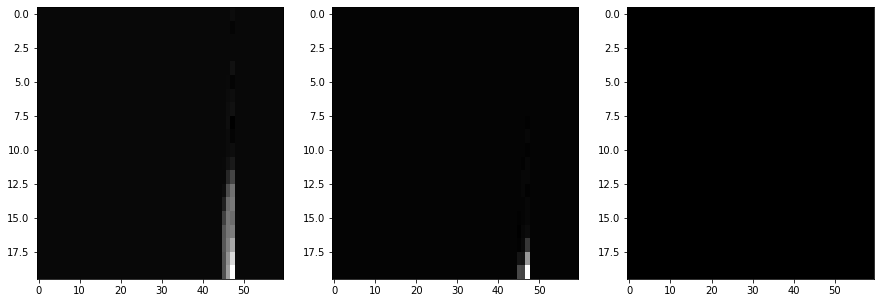

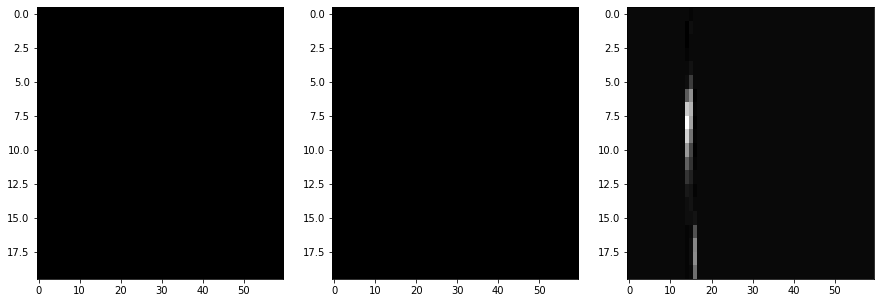

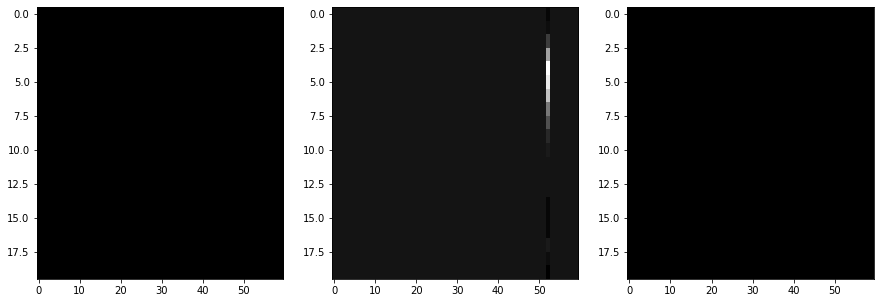

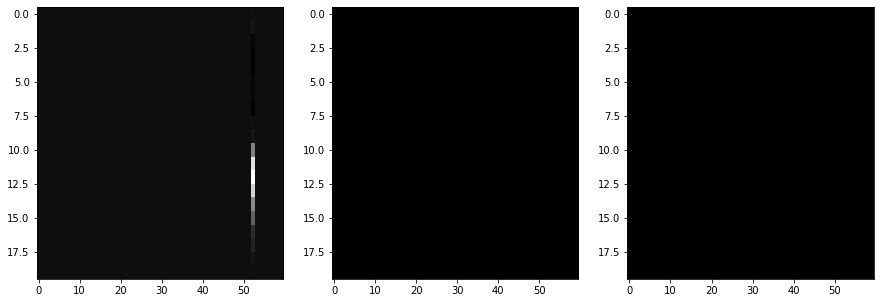

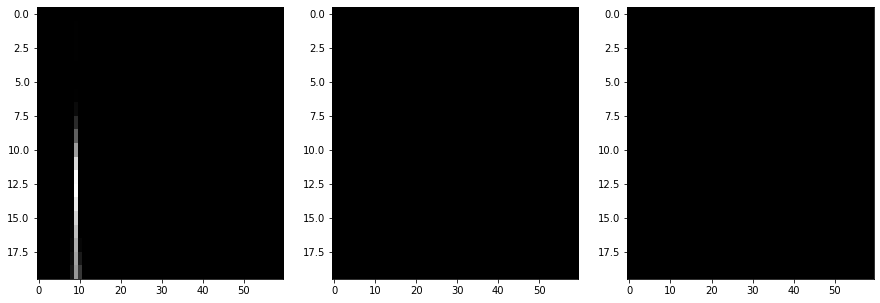

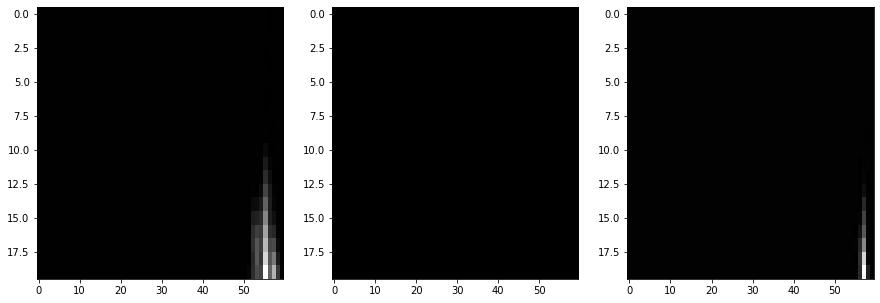

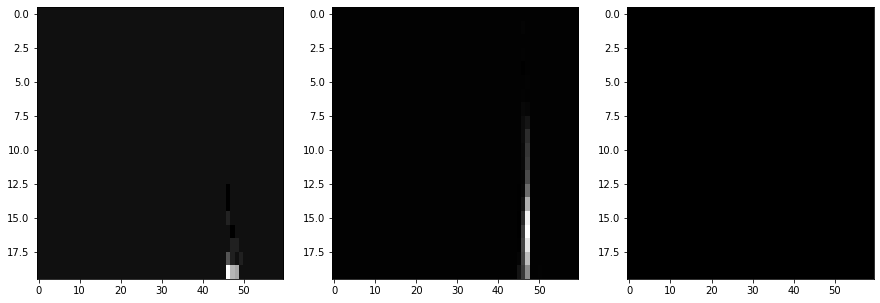

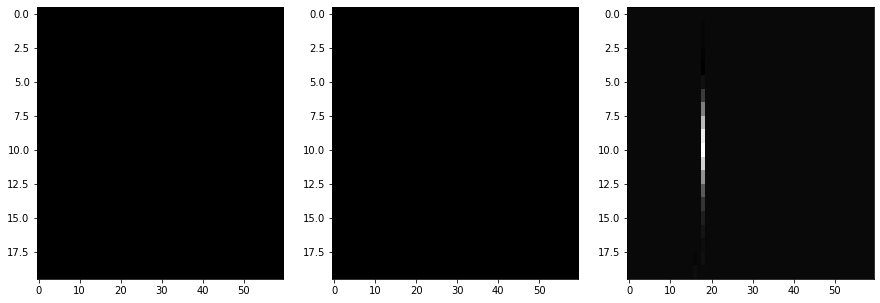

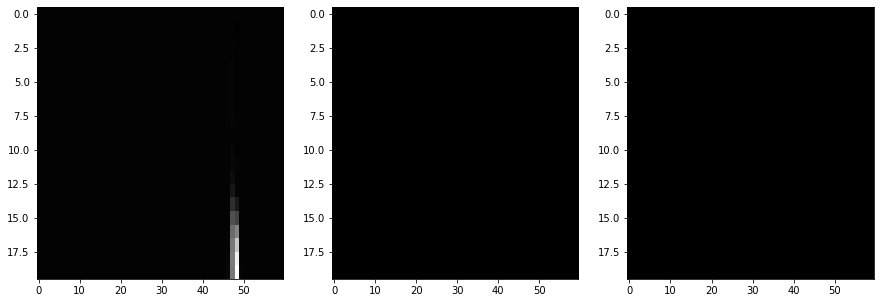

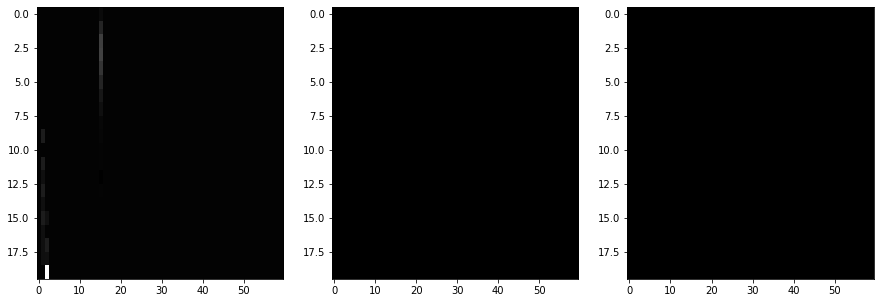

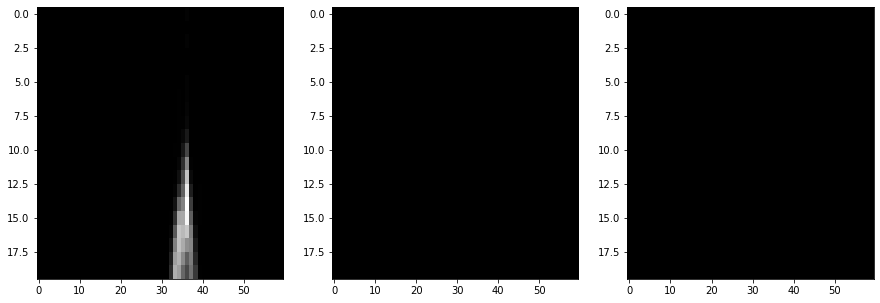

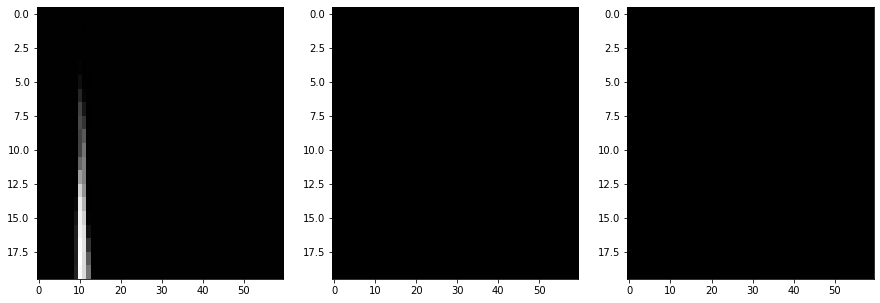

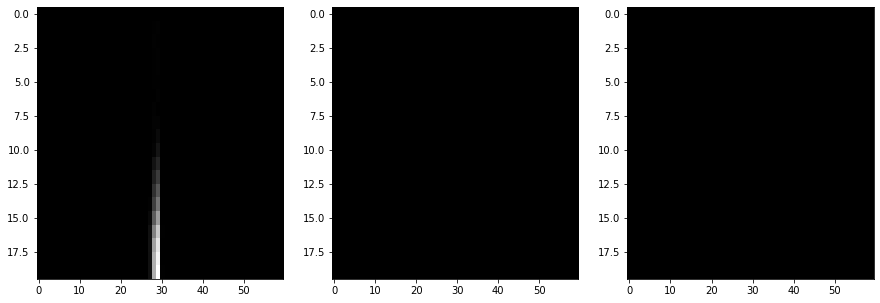

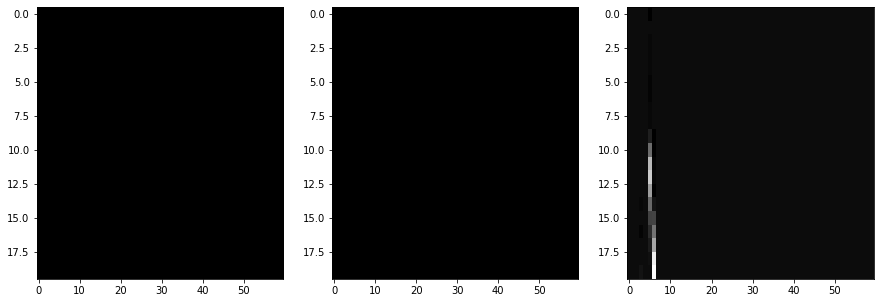

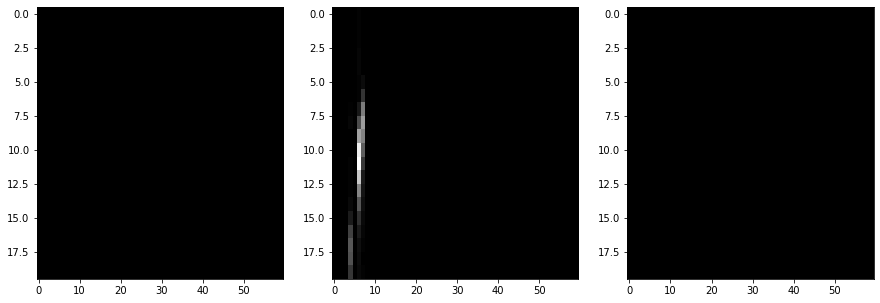

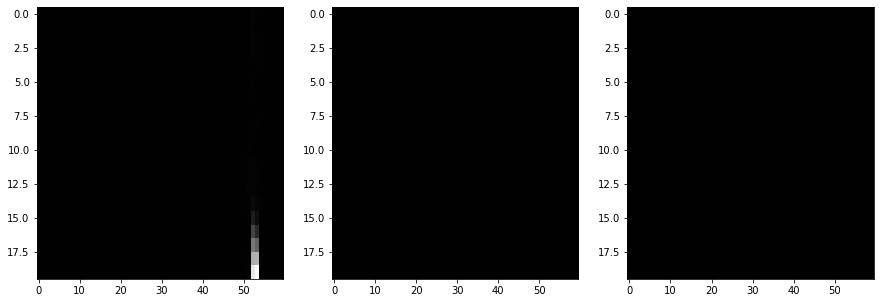

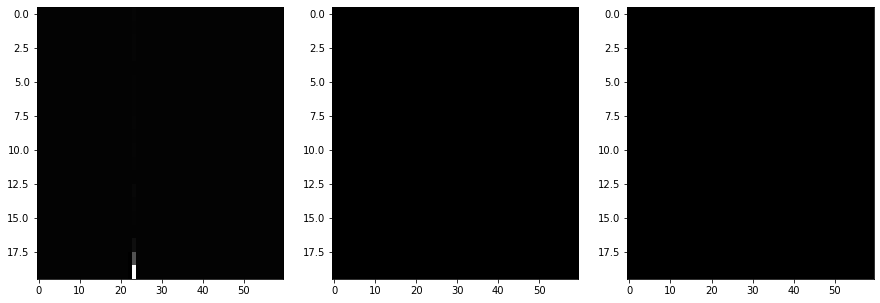

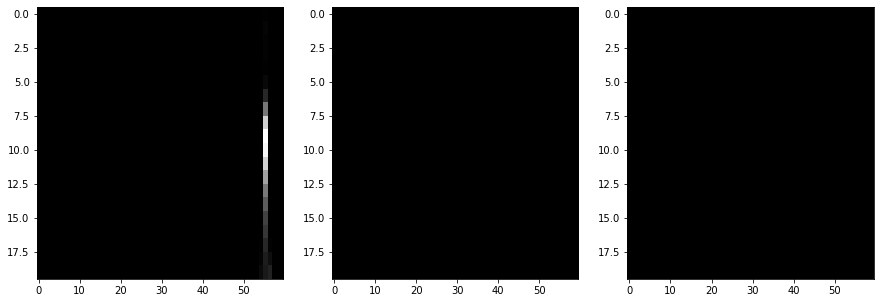

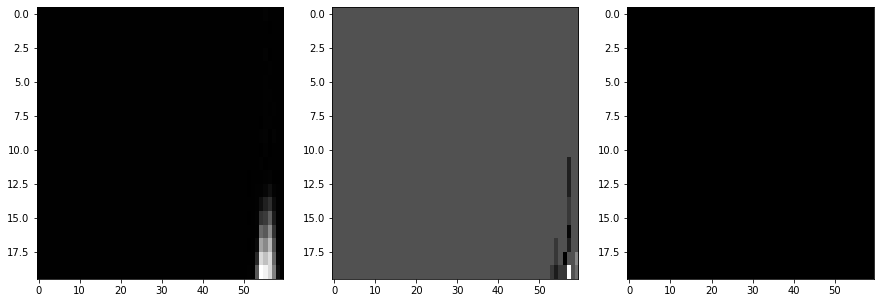

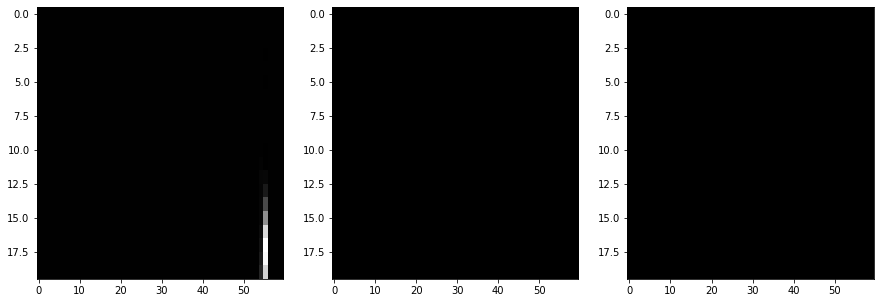

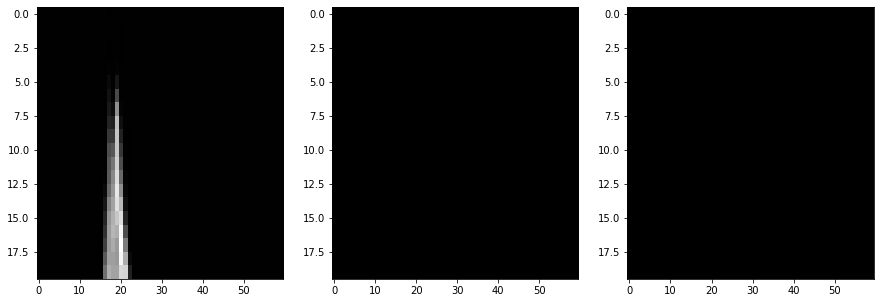

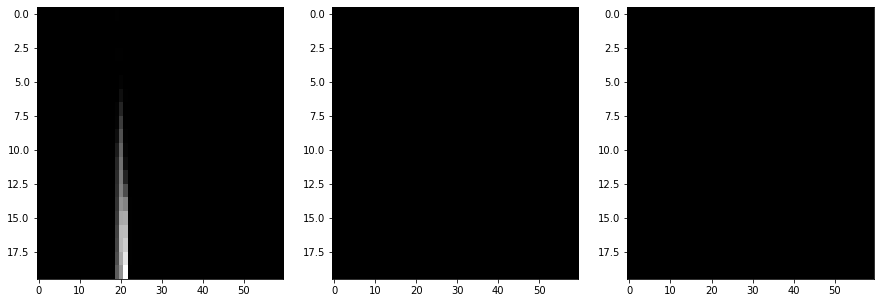

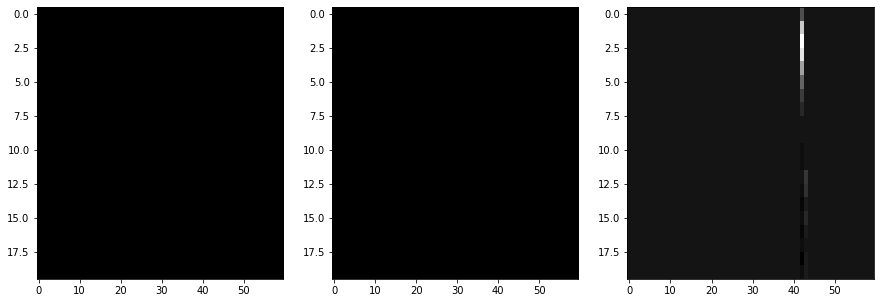

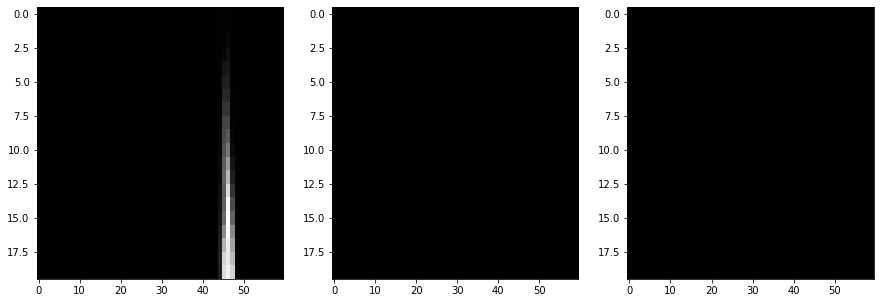

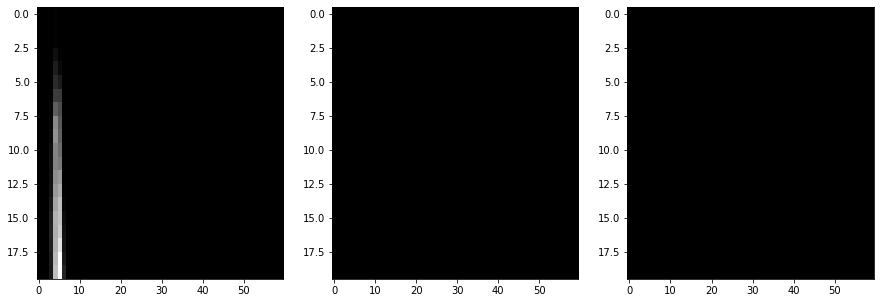

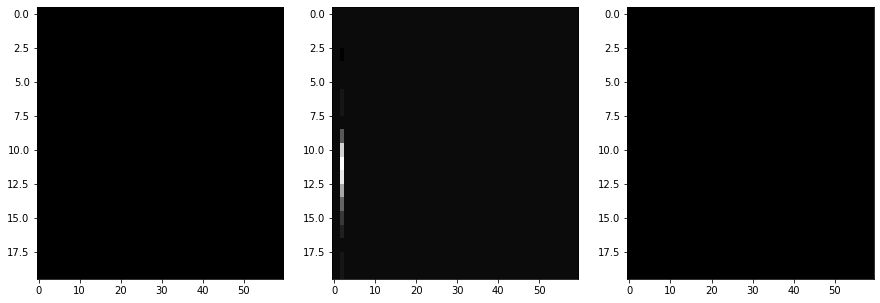

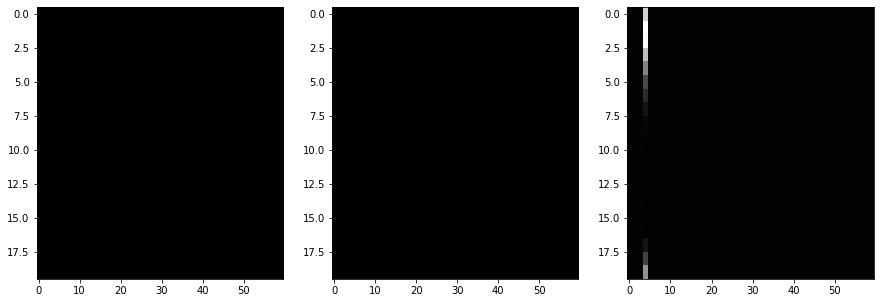

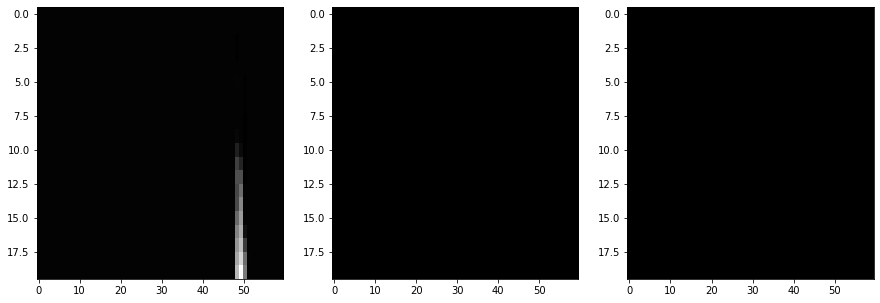

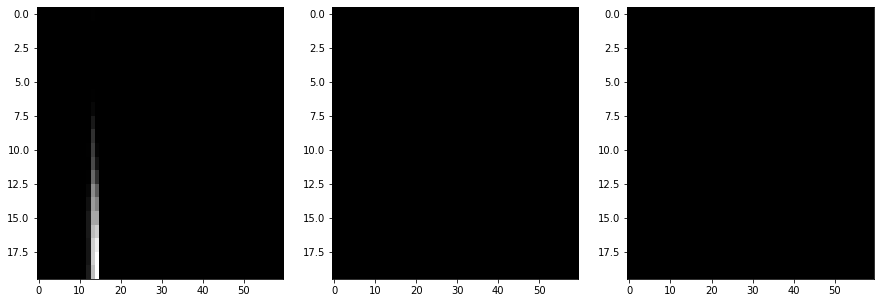

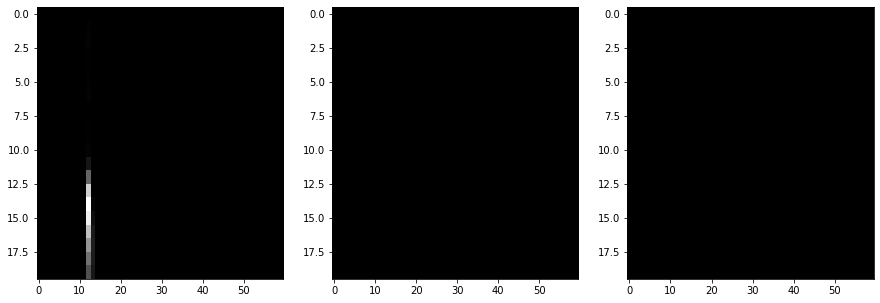

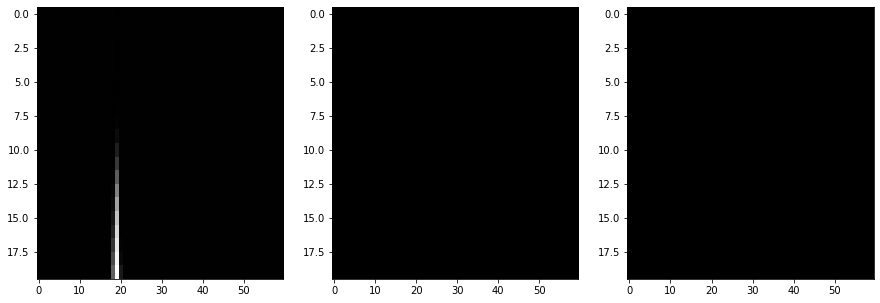

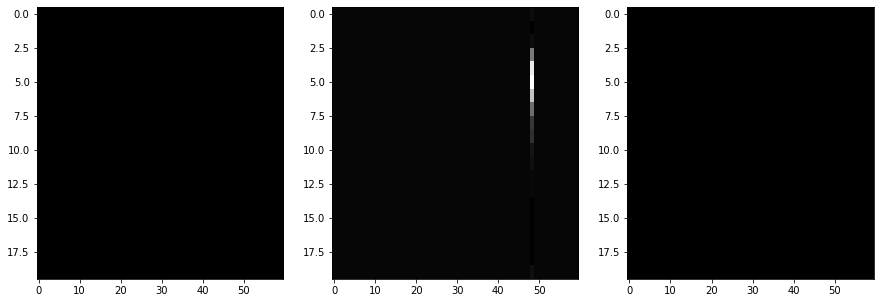

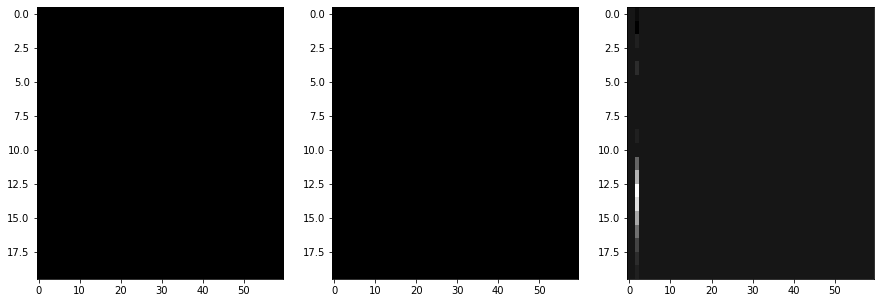

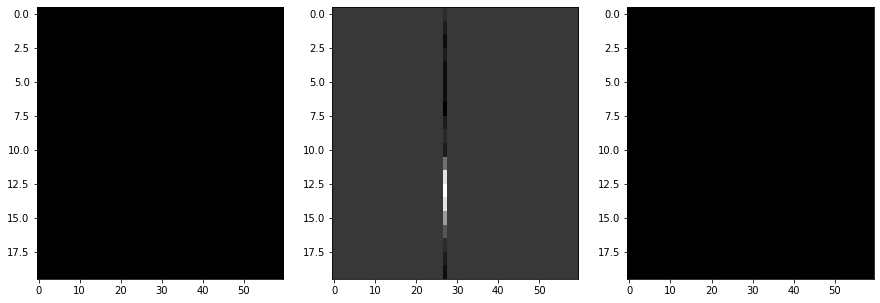

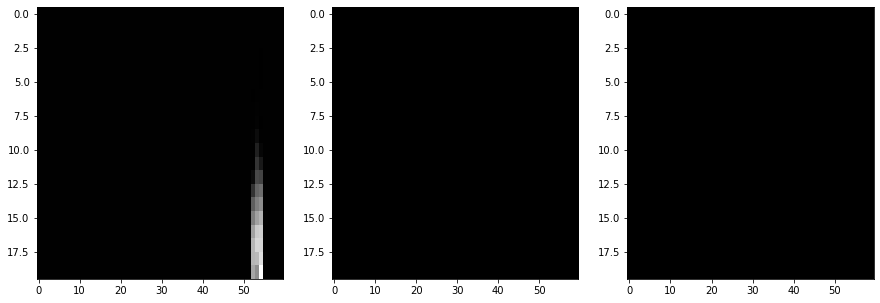

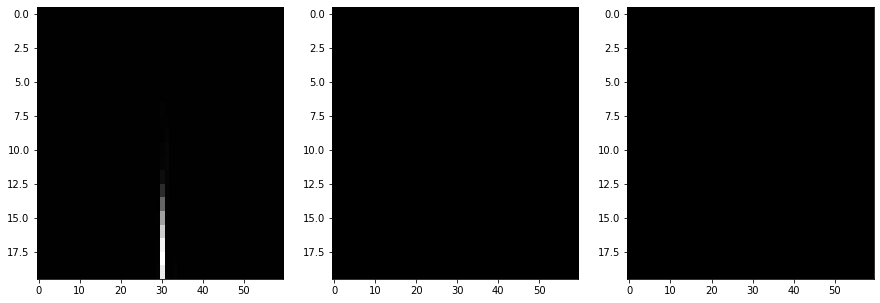

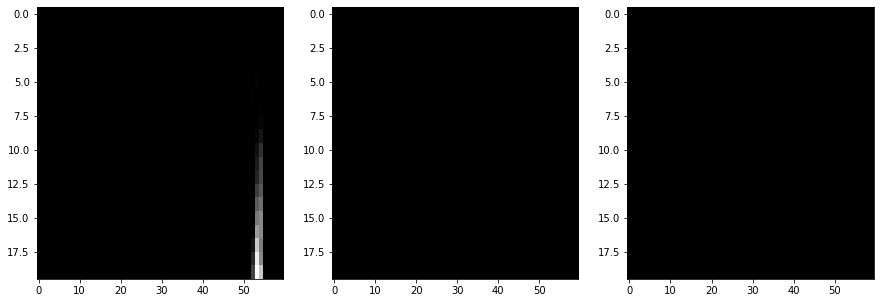

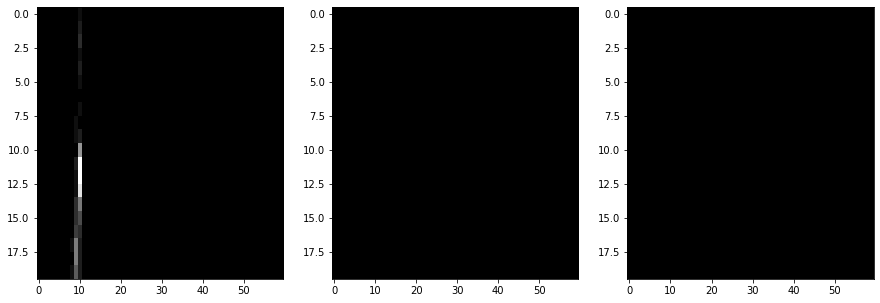

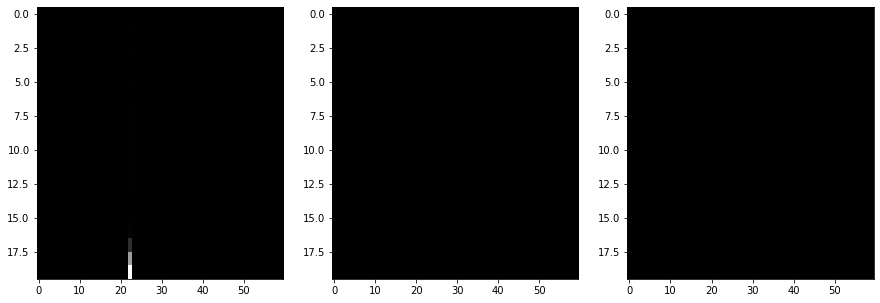

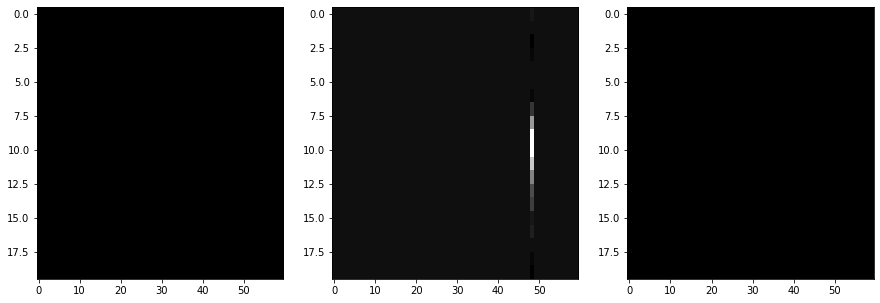

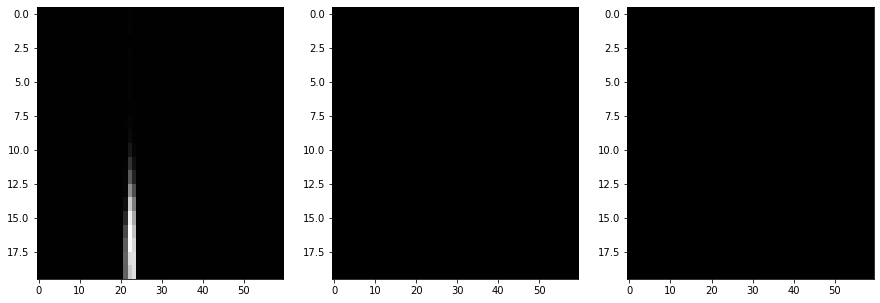

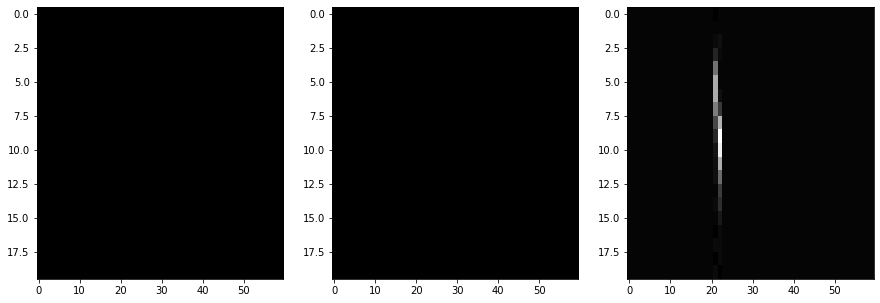

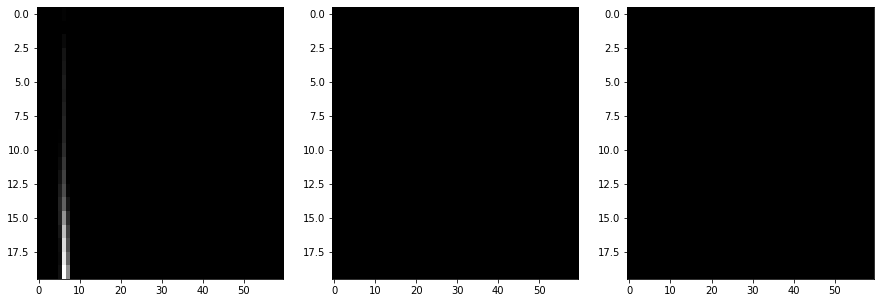

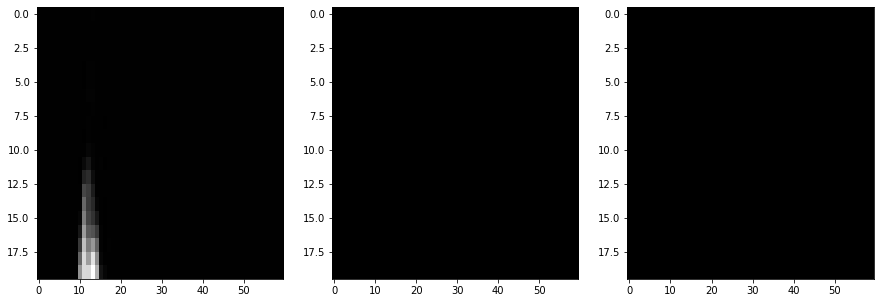

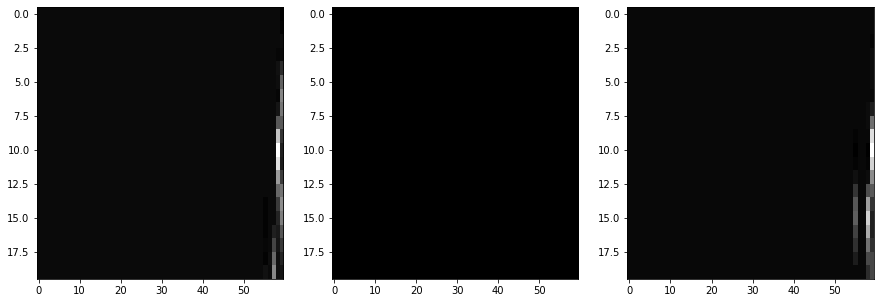

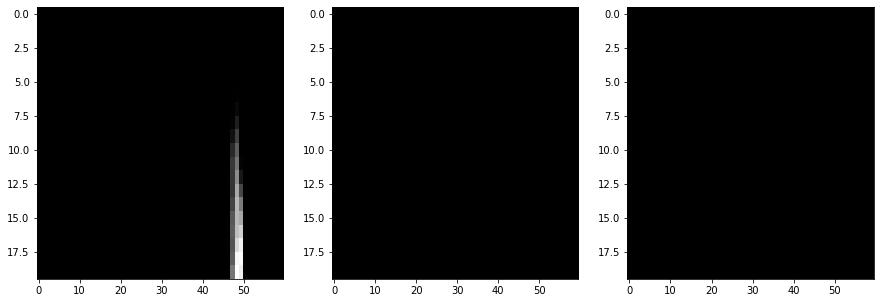

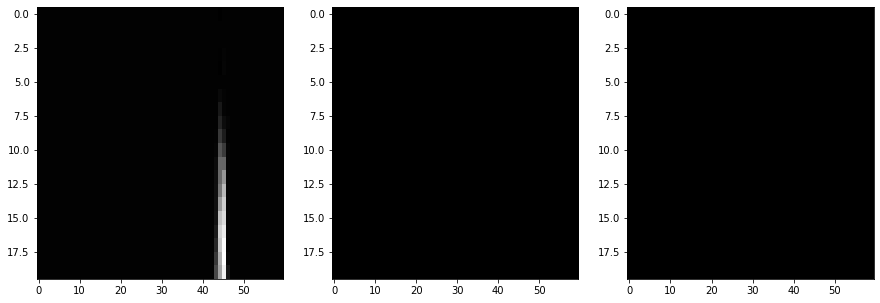

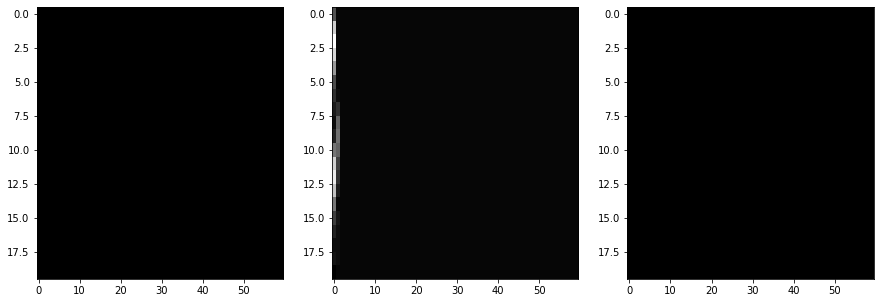

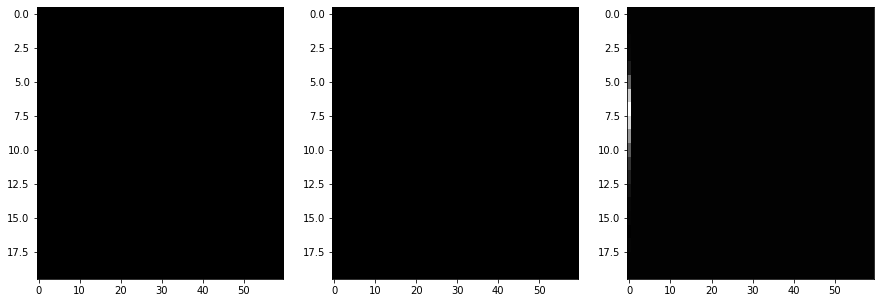

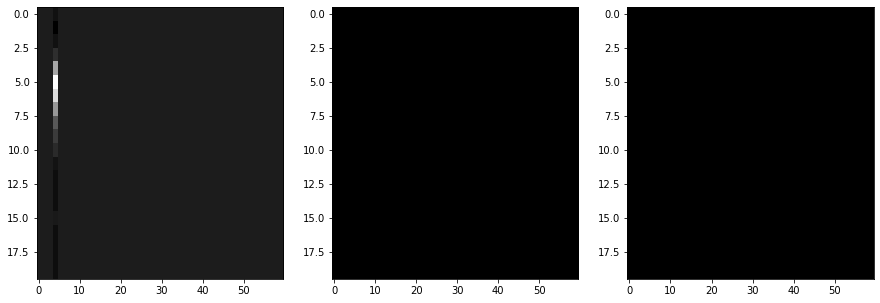

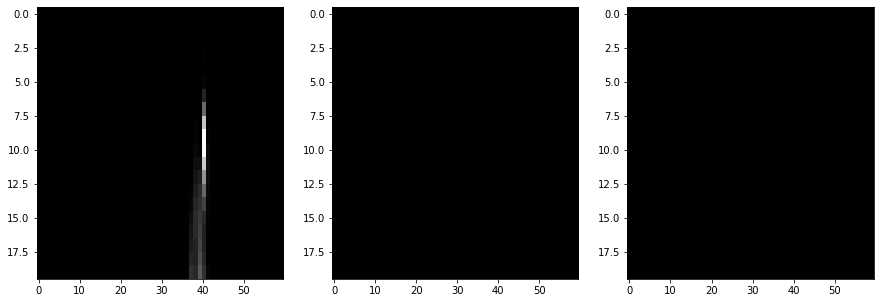

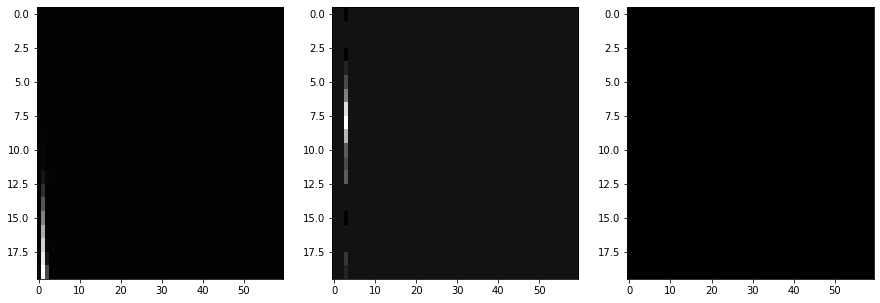

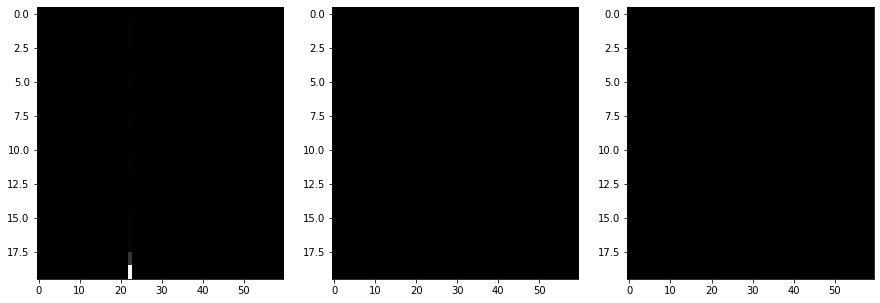

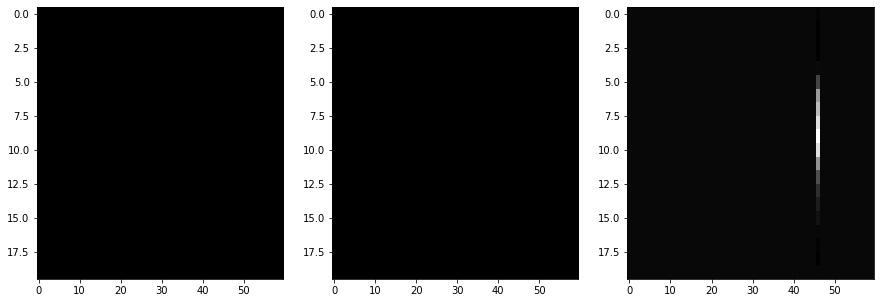

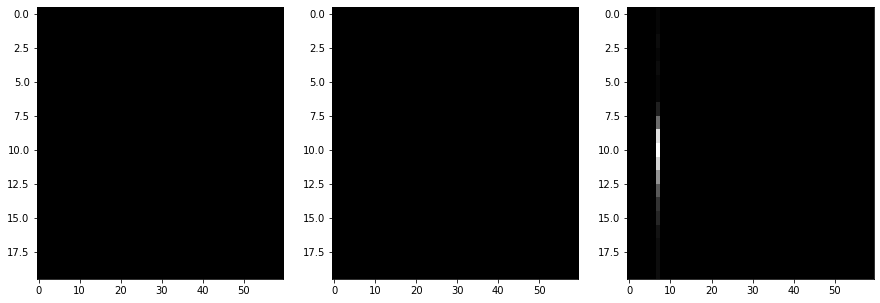

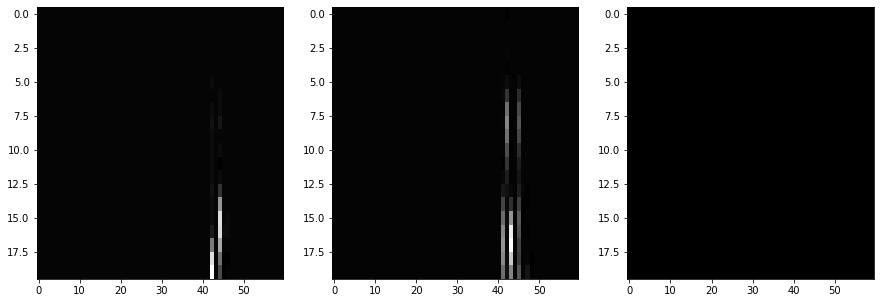

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    if pos >50:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    cut1=0.56
    cut2=0.6
    for n,e in enumerate(x):
        if pos >100:
            break
        ch = (cut1 <= pred_n1[n]) and (pred_n1[n] <= cut2) and (cut1 <= pred_n1[n]) and (pred_n4[n] <= cut2)
        #print(pos)
        if ch:
            pos = pos +1
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:20,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:20,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:20,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
end = time.time()
print(end - start)

NuMu_1_1_1?_
#.npz files =  10
/home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_1_18_data.npz (4727, 1)
[[(587.875, 82,    0.   ) (288.   , 46, 3324.27 ) (173.55 , 81, 4339.876)]] [1954.625] [[  23.01323 1478.3696  1947.8285 ]]
[[(7109.975, 69,     0.   ) (1614.875, 70, 15639.901)
  (1006.1  , 76, 15608.159)]] [10327.675] [[ -212.02106 -1251.7673   1947.8735 ]]
[[(1861.325, 53,     0.   ) ( 207.7  , 44, 15619.424)
  (  69.925, 54, 15619.244)]] [3387.375] [[-2438.594   5463.294   1945.1923]]
[[(601.575, 40,     0.   ) (379.325, 50, 14275.189)
  ( 41.25 , 49, 10372.323)]] [1133.15] [[-712.8557  -809.30316 1947.9088 ]]
[[(640.175, 73,     0.   ) (275.375, 66, 15566.991)
  ( 30.975, 72, 15644.726)]] [1089.5] [[ 593.008       5.946361 1947.9724  ]]
[[(1603.35 , 38,     0.   ) ( 109.675, 29, 15670.261)
  ( 102.725, 48, 16262.637)]] [4338.2] [[ 2148.0364 -4723.104   1945.8882]]
[[(1352.675, 16,     0.   ) ( 406.825, 25, 15624.736)
  ( 123.6  ,  8, 15637.061)]] [2526.425] [[ -327.

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/home/dup193/work/double_pulse/data/images_3str/Images_NuMu_1_1_11_data.npz (4560, 1)
[[(524.675, 3,     0.   ) (523.625, 2, 15682.755) (144.725, 4, 15647.253)]] [1742.35] [[ 2890.0432 -1211.5765  1947.2297]]
[[(1663.35, 69,     0.   ) ( 194.25, 70, 15639.901)
  ( 174.7 , 62, 15602.474)]] [2199.75] [[-2039.982   -953.2352  1947.6023]]
[[(4876.75 , 73,     0.   ) ( 815.775, 74, 13948.177)
  ( 259.   , 66, 15566.991)]] [7288.1] [[-22715.996      489.48557   1907.5037 ]]
[[(884.3  , 55,     0.   ) (661.425, 63, 15724.399)
  (510.65 , 64, 14742.8  )]] [2587.325] [[ 226.98456  623.67395 1947.9655 ]]
[[(654.475, 20,     0.   ) (153.975, 19, 13544.796)
  ( 89.05 , 12, 15607.295)]] [1394.325] [[11292.394   6137.6284  1935.0422]]
[[(1461.425,  6,     0.    ) ( 131.65 ,  5, 15566.9375)
  ( 101.125, 13, 15570.326 )]] [1915.875] [[-3029.5962   -466.11902  1947.263  ]]
[[(647.325, 81,    0.    ) (256.3  , 45, 6285.4956)
  (215.925, 86, 3591.3179)]] [2029.375] [[-285.1181  278.5534 1947.9875]]
[[(91

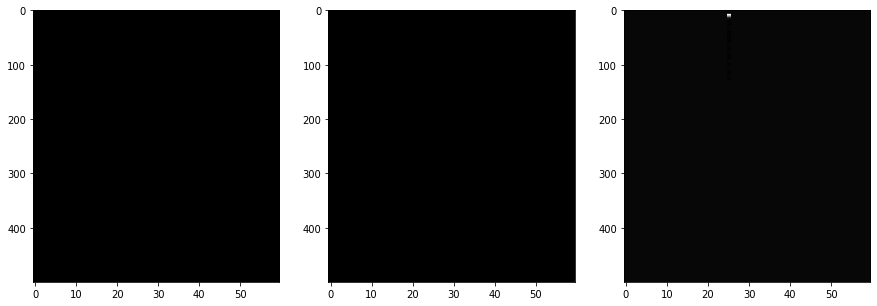

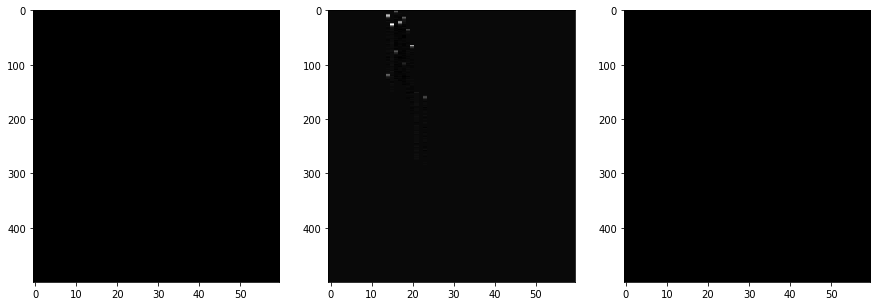

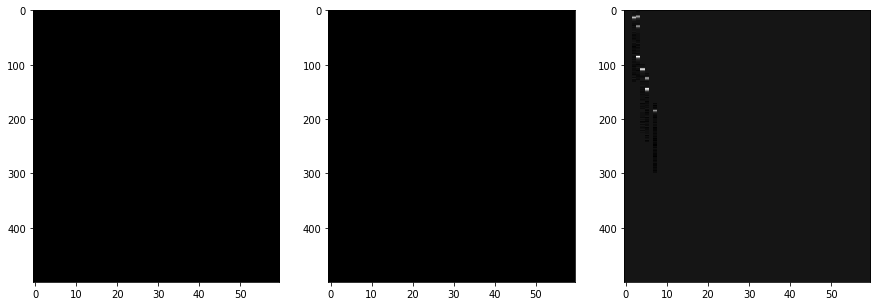

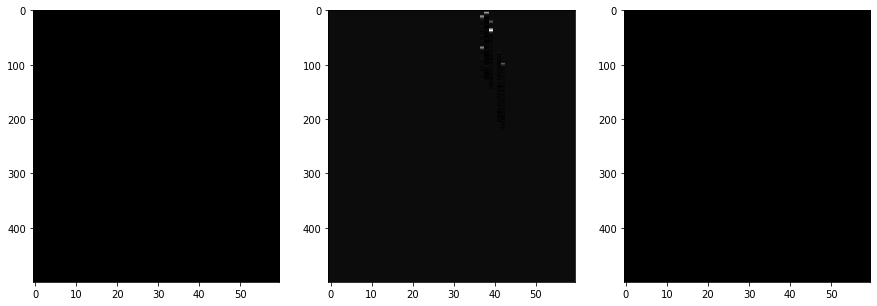

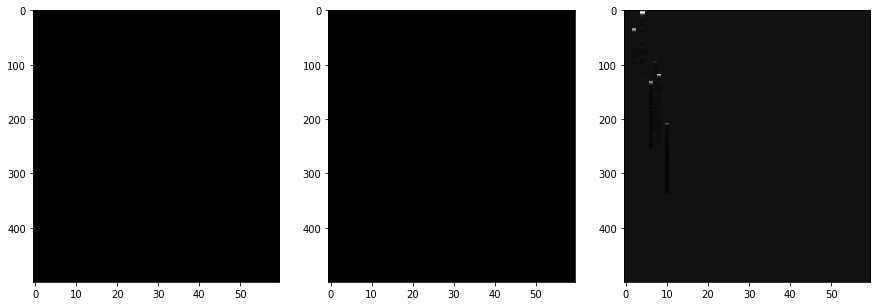

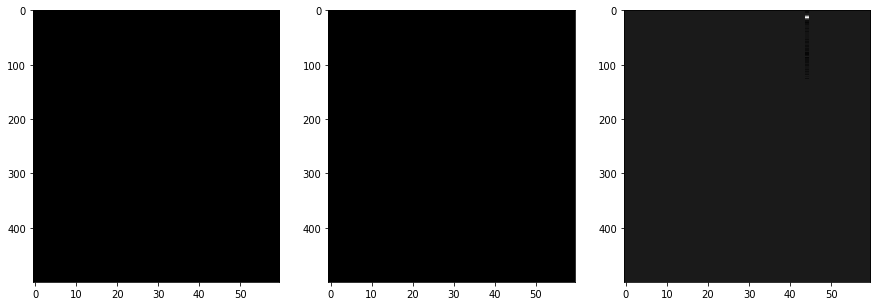

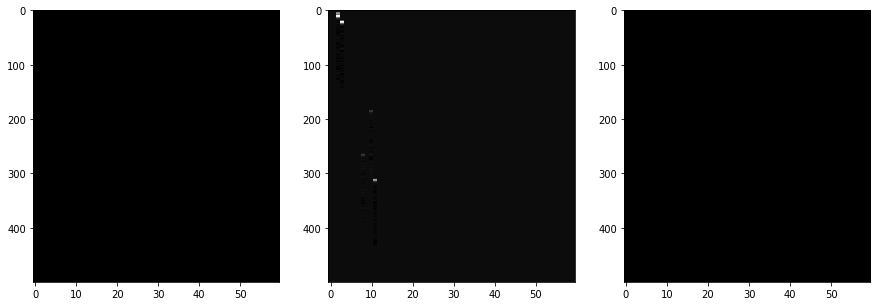

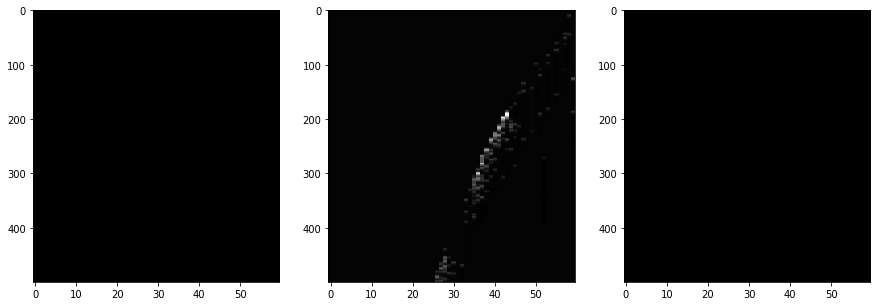

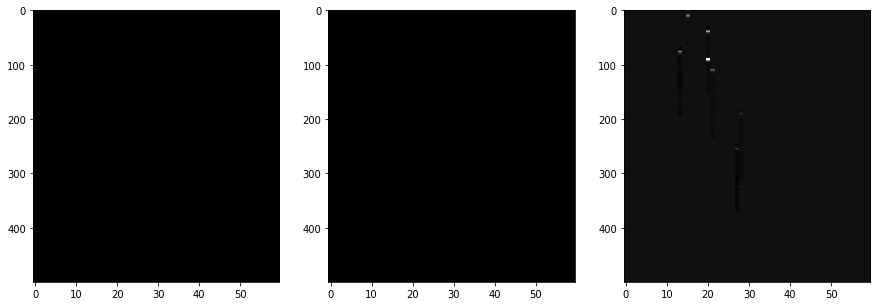

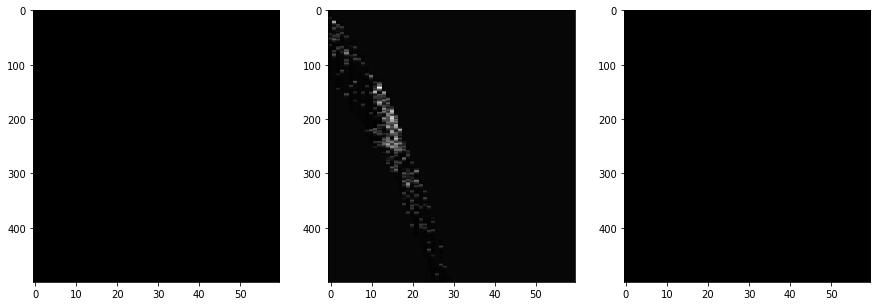

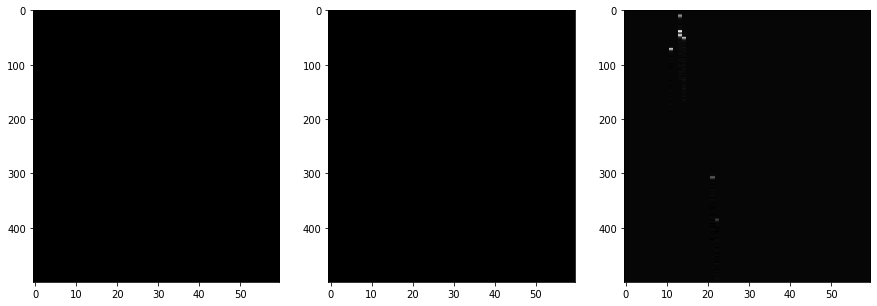

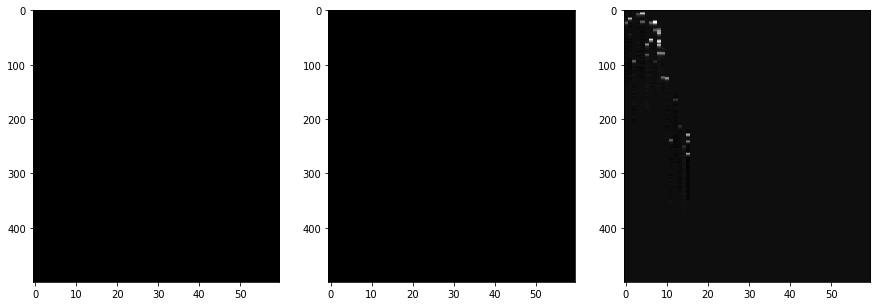

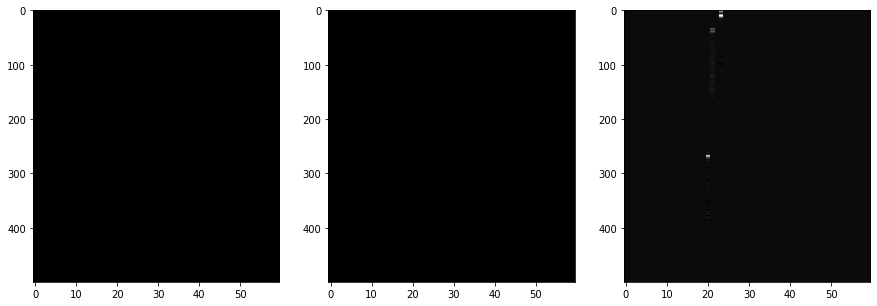

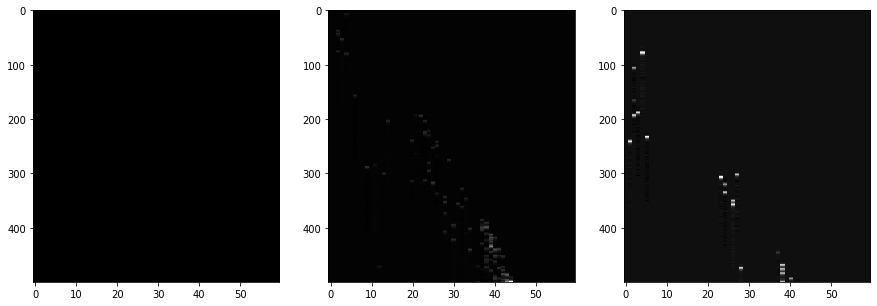

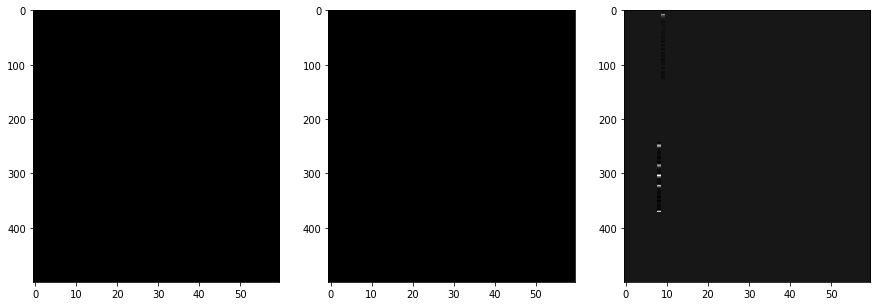

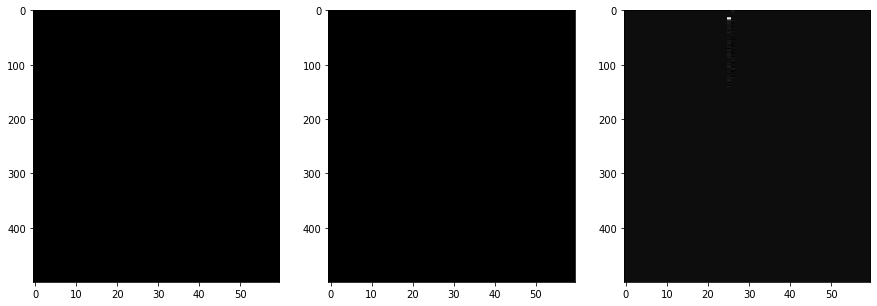

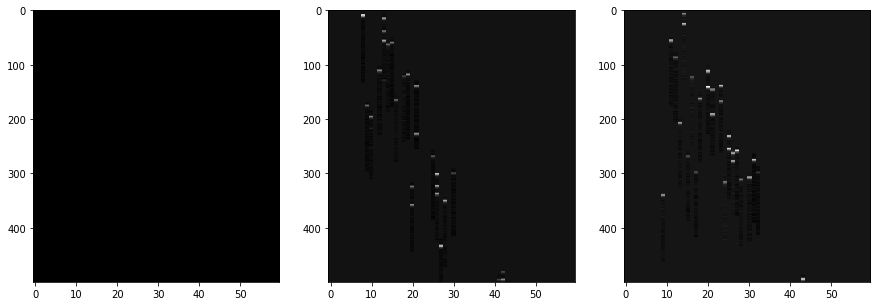

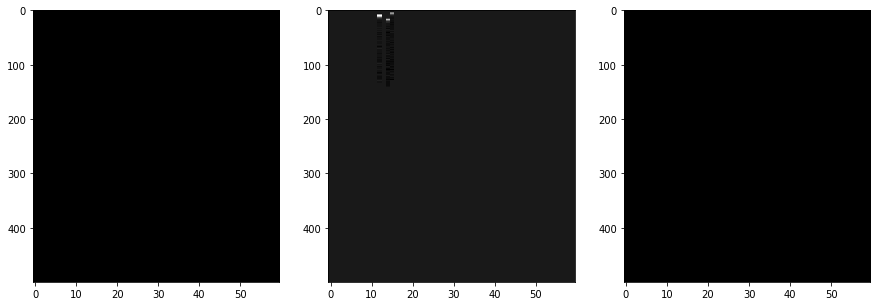

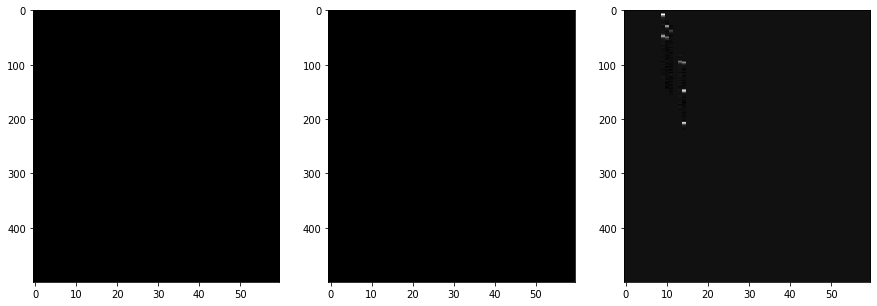

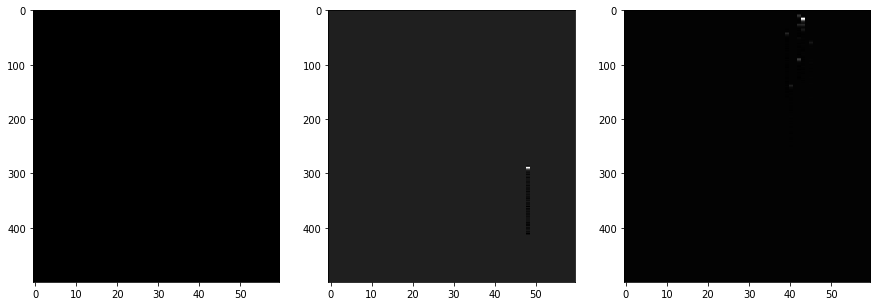

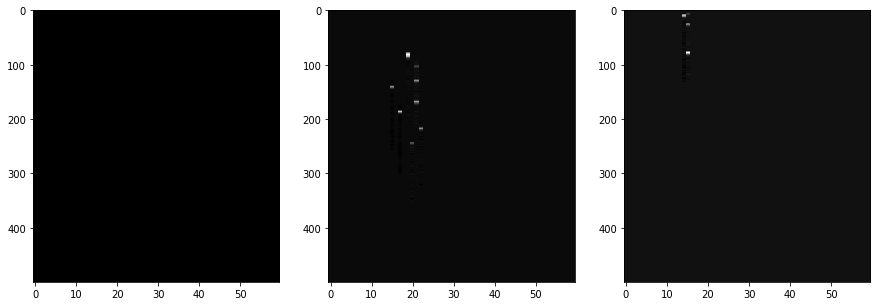

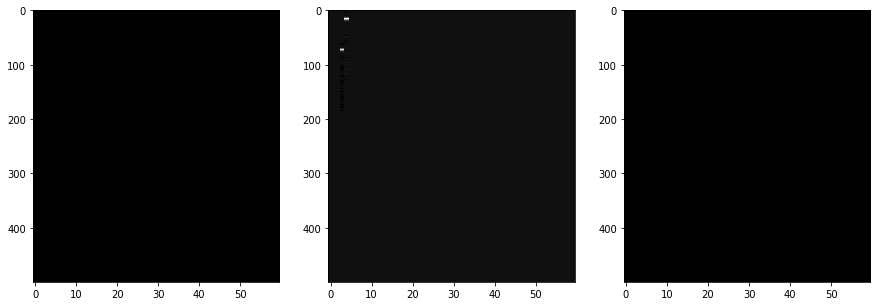

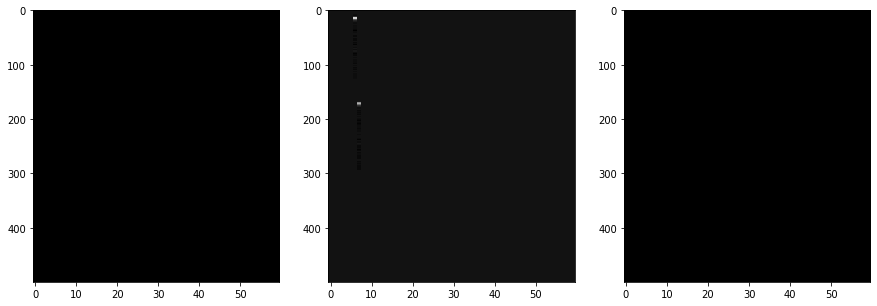

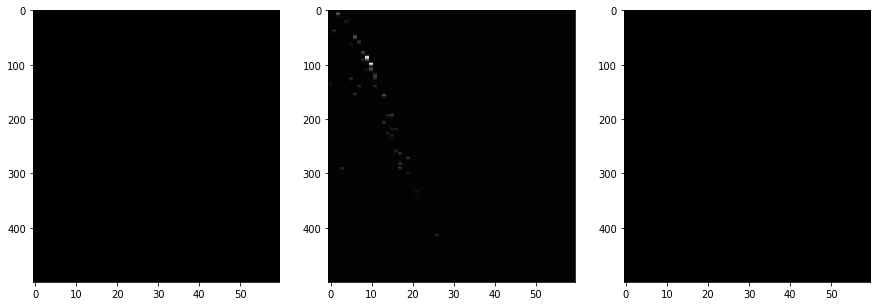

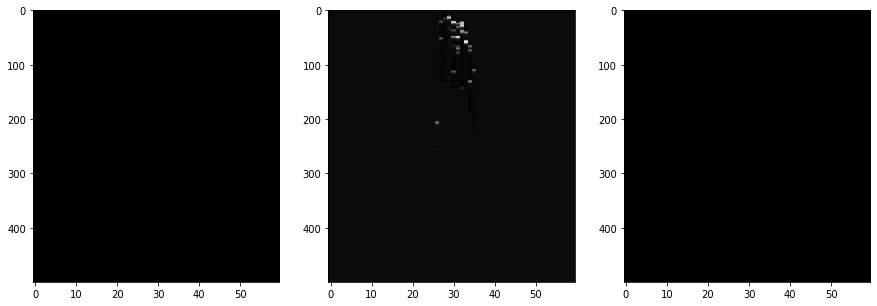

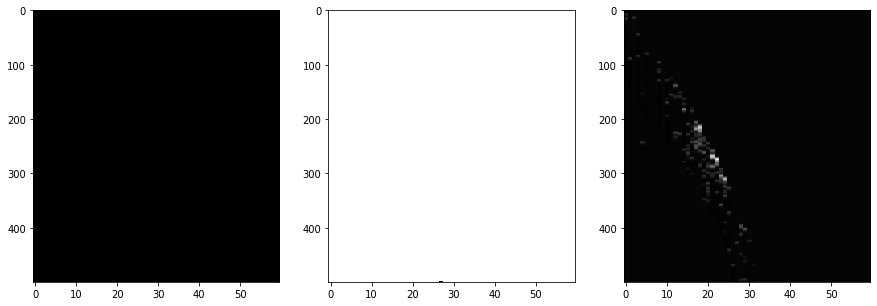

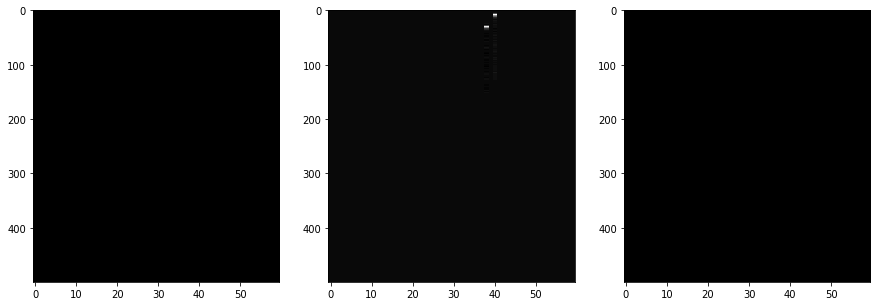

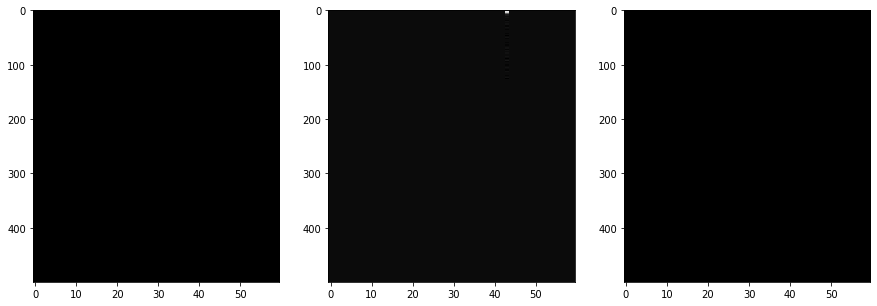

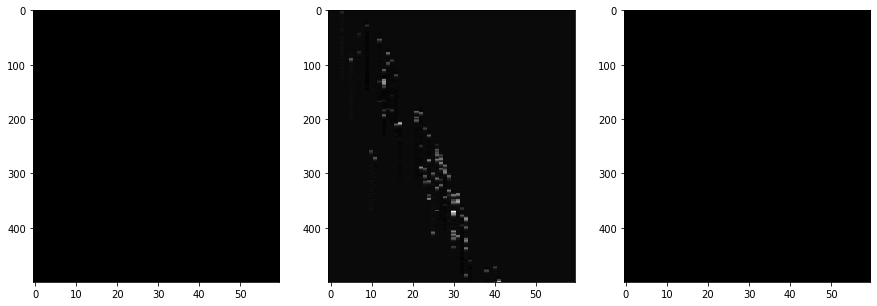

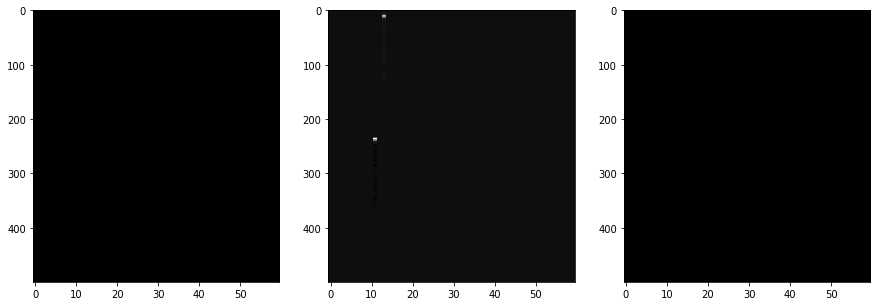

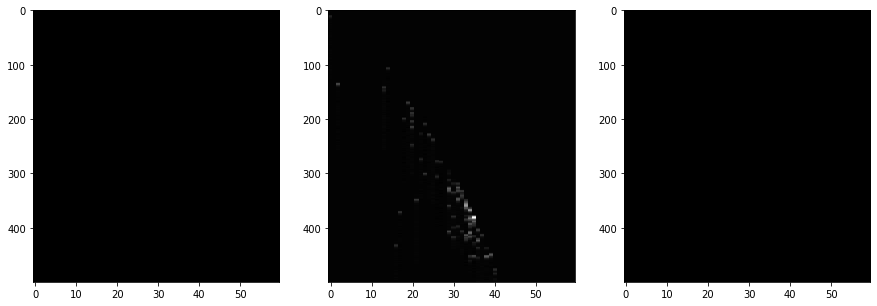

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    if pos >30:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    #im = (x['image']-mean)/std
    #pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #im = (x['image']-mean_3)/std_3
    #pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #cut1=0.56
    #cut2=0.6
    for n,e in enumerate(x):
        if pos >30:
            break
        #ch = (cut1 <= pred_n1[n]) and (pred_n1[n] <= cut2) and (cut1 <= pred_n1[n]) and (pred_n4[n] <= cut2)
        #print(pos)
        #print(np.sum(e['image'][0,:,:,0]))
        if np.sum(e['image'][0,:,:,0])==0:
            print(e['qst'],e['qtot'],e['primary']['position'])
            pos = pos +1
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
end = time.time()
print(end - start)

In [15]:
# pos = 0
# print(name)
# start = time.time()
# print("hello")
# start = time.time()
# data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
# print('#.npz files = ',n_files)
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#  #   print(x.dtype)
#     print(file_name, x.shape)
#     y = np.zeros(x.shape[0],dtype = save_dtype)    
#      #Get_preds    
#     for n,e in enumerate(x):    #mean = np.mean(im)
#         im = (e['image']-mean)/std
#         pred_n1 = model.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         pred_n2 = model_m.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         im = (e['image']-mean_3)/std_3
#         pred_n3 = model_3.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
#         #im = (e['image']-mean_4)/std_4
#         pred_n4 = model_4.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]])
        
#         #print(pred_mc[0], pred_mc.dtype)
#         preds = np.zeros(1,dtype = preds_dtype)    
#         preds[['n1','n2','n3','n4']] = (pred_n1,pred_n2,pred_n3,pred_n4)
#         weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
#                                  n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
#         y[["id","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
#            "logan_veto","hese_old","hese","weight"]][n]=(e['id'],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
#                                                          e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
#                                                          e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
#        # print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    
    
#     data[pos:pos+len(x)] = y
#     pos = pos + len(x)
    
# end = time.time()
# print(end - start)

NuE_3_1_1
hello
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuE_3_1_1_data.npz (420, 1)
105.5365993976593
